# **Imorting Necessary Libraries**

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Difining the Paths for Data**

In [3]:
path = '/content/drive/MyDrive/Dataset'

# **Visualizing the data**

In [4]:
images_6_20 = glob.glob(path + "/6-20/*")
images_25_30 = glob.glob(path + "/25-30/*")
images_42_48 = glob.glob(path + "/42-48/*")
images_60_98 = glob.glob(path + "/60-98/*")

In [5]:
print(len(images_6_20))
print(len(images_25_30))
print(len(images_42_48))
print(len(images_60_98))

2514
2495
1439
2649


In [6]:
data = pd.DataFrame(np.concatenate([["6-20"] * len(images_6_20), ['25-30'] *  len(images_25_30), ['42-48'] * len(images_42_48), ['60-98'] * len(images_60_98)]), columns = ["class"])

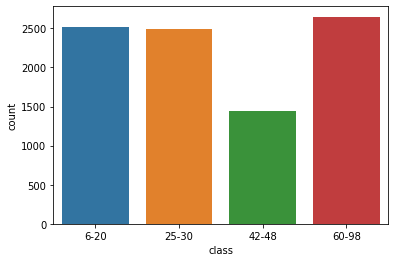

In [7]:
sns.countplot(x = 'class', data = data)

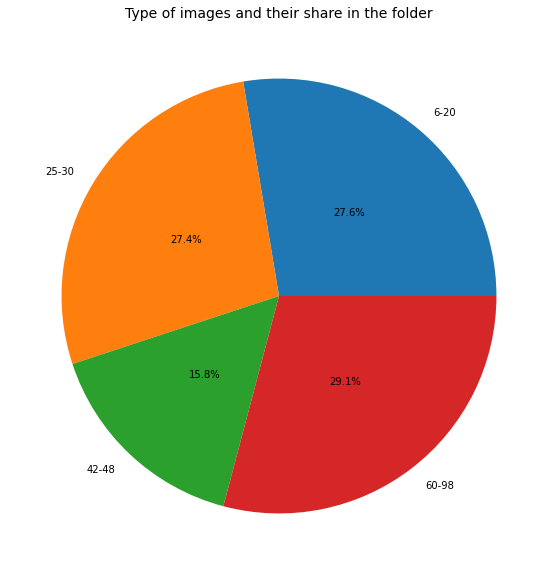

In [8]:
plt.figure(figsize = (15, 10))
plt.pie(x = np.array([len(images_6_20), len(images_25_30), len(images_42_48), len(images_60_98)]), autopct = "%.1f%%", explode = [0, 0, 0, 0], labels = ["6-20", "25-30", "42-48", "60-98"], pctdistance = 0.5)
plt.title("Type of images and their share in the folder", fontsize = 14);

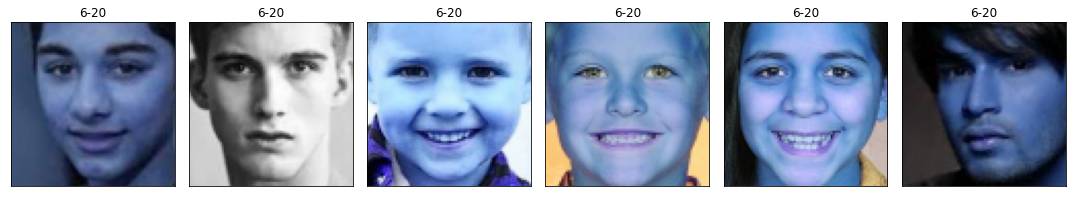

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(images_6_20[i])
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title("6-20")
fig.tight_layout()    

plt.show()

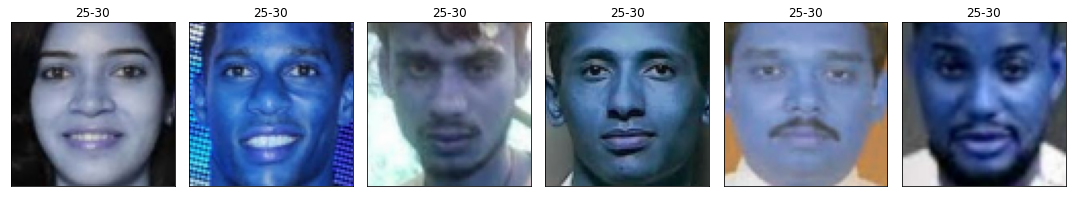

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(images_25_30[i])
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title("25-30")
fig.tight_layout()    

plt.show()

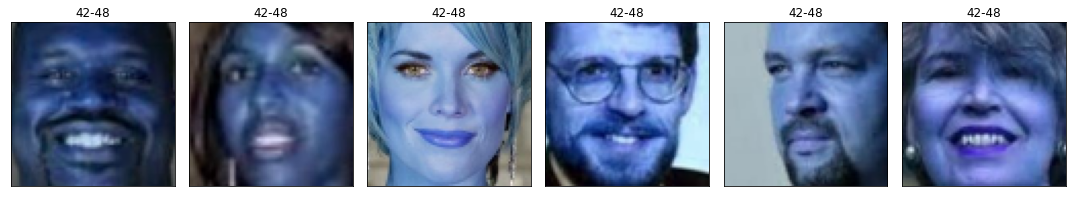

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(images_42_48[i])
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title("42-48")
fig.tight_layout()    

plt.show()

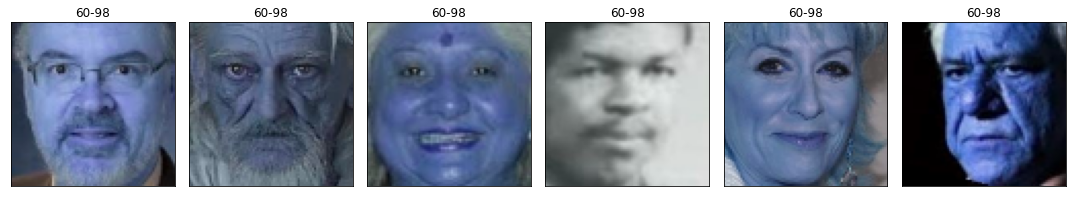

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(images_60_98[i])
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title("60-98")
fig.tight_layout()    

plt.show()

# **Creating Image Data Generators**

In [13]:
datagen = ImageDataGenerator(rescale = 1./255.,)

generator = datagen.flow_from_directory(
        path,
        target_size = (80, 80),
        class_mode = 'categorical'
)

Found 9097 images belonging to 4 classes.


In [14]:
datagen = ImageDataGenerator(rescale = 1./255.,)

full_dataloader = datagen.flow_from_directory(
    path,
    batch_size = 9097,
    target_size = (80, 80),
    class_mode = 'categorical'
)

Found 9097 images belonging to 4 classes.


In [15]:
full_dataloader.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [16]:
full_dataloader.class_indices

{'25-30': 0, '42-48': 1, '6-20': 2, '60-98': 3}

In [17]:
full_dataloader.class_indices = {'25-30': 1, '42-48': 2, '6-20': 0, '60-98': 3}

In [18]:
full_dataloader.class_indices

{'25-30': 1, '42-48': 2, '6-20': 0, '60-98': 3}

# **Data Processing (Splitting the Data)**

In [19]:
x, t = next(iter(full_dataloader))

In [20]:
print(x.shape)
print(t.shape)

(9097, 80, 80, 3)
(9097, 4)


In [21]:
X_train_val, X_test, y_train_val, y_test = train_test_split(x, t, test_size = 0.2, random_state = 42)
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((7277, 80, 80, 3), (1820, 80, 80, 3), (7277, 4), (1820, 4))

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5457, 80, 80, 3), (1820, 80, 80, 3), (5457, 4), (1820, 4))

# **Defining the Model**

In [23]:
input_shape = (80, 80, 3)

base_model = tf.keras.applications.ResNet50V2(
    weights = 'imagenet',
    input_shape = input_shape,
    classes = 4,
    classifier_activation = "softmax",
    include_top = False
)

for layer in base_model.layers:
    layer.trainable = False
    
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'softmax'))

model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ["accuracy"])

94674944/94668760 [==============================] - 1s 0us/step


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 3, 3, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 23,827,588
Trainable params: 262,788
Non-trainable params: 23,564,800
_________________________________________________________________


In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 4)

history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 256,
    epochs = 20,
    validation_data = (X_val, y_val),
    callbacks = callback)

Epoch 1/20
22/22 [==============================] - 21s 153ms/step - loss: 1.8471 - accuracy: 0.4411 - val_loss: 1.1695 - val_accuracy: 0.5429
Epoch 2/20
22/22 [==============================] - 2s 96ms/step - loss: 1.0249 - accuracy: 0.5631 - val_loss: 1.0067 - val_accuracy: 0.5824
Epoch 3/20
22/22 [==============================] - 2s 97ms/step - loss: 0.9204 - accuracy: 0.6097 - val_loss: 0.9344 - val_accuracy: 0.6137
Epoch 4/20
22/22 [==============================] - 2s 97ms/step - loss: 0.8686 - accuracy: 0.6322 - val_loss: 0.9016 - val_accuracy: 0.6313
Epoch 5/20
22/22 [==============================] - 2s 96ms/step - loss: 0.8328 - accuracy: 0.6474 - val_loss: 0.8888 - val_accuracy: 0.6352
Epoch 6/20
22/22 [==============================] - 2s 96ms/step - loss: 0.7889 - accuracy: 0.6690 - val_loss: 0.8739 - val_accuracy: 0.6462
Epoch 7/20
22/22 [==============================] - 2s 97ms/step - loss: 0.7600 - accuracy: 0.6828 - val_loss: 0.8801 - val_accuracy: 0.6401
Epoch 8/20


# **Model Metrics**

In [26]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

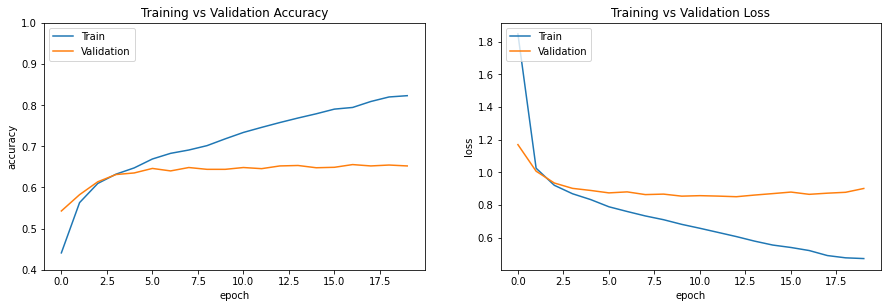

In [27]:
plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training Accuracy")
plt.plot(val_accuracy, label = "Validation Accuracy")
plt.ylim(0.4, 1)
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.title("Training vs Validation Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(2, 2, 2)
plt.plot(loss, label = "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.title("Training vs Validation Loss")
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

# **Predictions**

In [28]:
y_pred = np.argmax(model.predict(X_test, batch_size = 1), axis = 1) 

In [29]:
y_true = [np.argmax(y, axis = None, out = None) for y in y_test]

# **Confusion Matrix**

In [30]:
cm = confusion_matrix(y_true, y_pred)

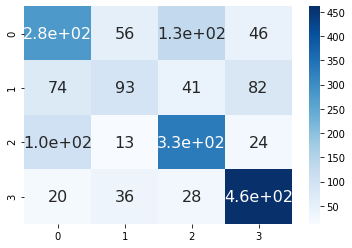

In [31]:
sns.heatmap(cm, annot = True, cmap = "Blues", annot_kws = {"size": 16})

Confusion Matrix


Text(69.0, 0.5, 'Predicted')

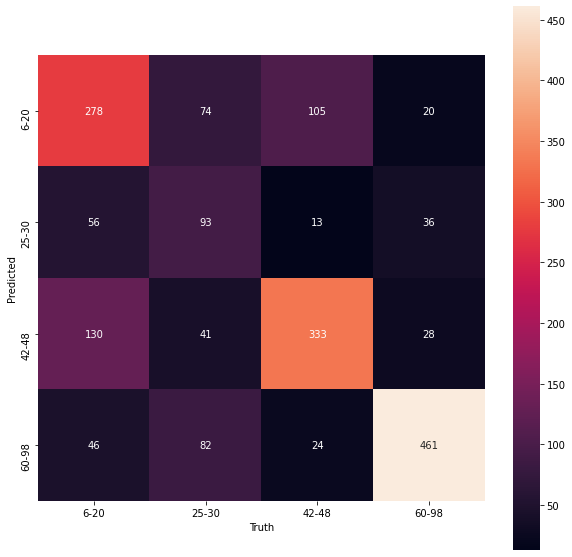

In [32]:
target_name = {'6-20': 0, '25-30': 1, '42-48': 2, '60-98': 3}
print('Confusion Matrix')
plt.figure(figsize = (10,10))
_ = sns.heatmap(cm.T, annot = True, fmt = 'd', cbar = True, square = True, xticklabels = target_name.keys(),
             yticklabels = target_name.keys())
plt.xlabel('Truth')
plt.ylabel('Predicted')

# **Classification Report**

In [33]:
print('Classification Report')
print(classification_report(y_true, y_pred, target_names = target_name.keys()))

Classification Report
              precision    recall  f1-score   support

        6-20       0.58      0.55      0.56       510
       25-30       0.47      0.32      0.38       290
       42-48       0.63      0.70      0.66       475
       60-98       0.75      0.85      0.80       545

    accuracy                           0.64      1820
   macro avg       0.61      0.60      0.60      1820
weighted avg       0.63      0.64      0.63      1820



# **Analysing the Results**

In [34]:
confusion = []

for i, j in zip(y_true, y_pred):
  if i == 3 and j == 0:
    confusion.append('Yes')
  else:
    confusion.append('No')

In [35]:
confusion

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',

In [36]:
confusion_table = pd.DataFrame(data = confusion, columns = ["Looks Young"])
confusion_table

,Looks Young
0,No
1,No
2,No
3,No
4,No
...,...
1815,No
1816,No
1817,No
1818,No


In [37]:
confusion_table = pd.DataFrame({'Predicton':y_pred,
                                'Truth': y_true,
                                'Looks Young': confusion})
confusion_table

,Predicton,Truth,Looks Young
0,3,3,No
1,2,2,No
2,2,0,No
3,0,1,No
4,3,3,No
...,...,...,...
1815,3,3,No
1816,0,0,No
1817,2,0,No
1818,2,2,No


In [38]:
confusion_table['Looks Young'] == 'Yes'

0       False
1       False
2       False
3       False
4       False
        ...  
1815    False
1816    False
1817    False
1818    False
1819    False
Name: Looks Young, Length: 1820, dtype: bool

In [39]:
Looks_Young = confusion_table[confusion_table['Looks Young'] == 'Yes']
Looks_Young

,Predicton,Truth,Looks Young
310,0,3,Yes
503,0,3,Yes
637,0,3,Yes
748,0,3,Yes
773,0,3,Yes
823,0,3,Yes
842,0,3,Yes
904,0,3,Yes
1023,0,3,Yes
1056,0,3,Yes


In [40]:
Looks_Young.index

Int64Index([ 310,  503,  637,  748,  773,  823,  842,  904, 1023, 1056, 1224,
            1393, 1395, 1409, 1422, 1448, 1552, 1620, 1771, 1804],
           dtype='int64')

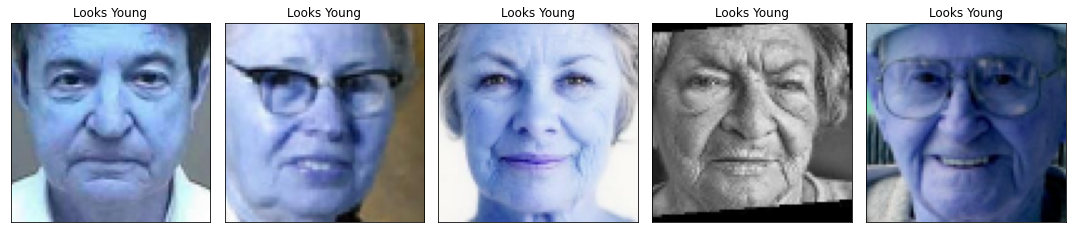

In [41]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in zip([310, 503, 637, 748, 773], axes.flat):
    img = cv2.imread(images_60_98[i])
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title("Looks Young")
fig.tight_layout()    

plt.show()